Model Training

1.1 import Data and Required packages


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV

# CatBoost and XGBoost
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')


In [12]:
!pip install catboost xgboost


  Using cached catboost-1.2.10-cp313-cp313-win_amd64.whl.metadata (1.5 kB)
  Using cached xgboost-3.2.0-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
Using cached catboost-1.2.10-cp313-cp313-win_amd64.whl (100.2 MB)
Using cached xgboost-3.2.0-py3-none-win_amd64.whl (101.7 MB)
Using cached graphviz-0.21-py3-none-any.whl (47 kB)

   ---------------------------------------- 0/3 [graphviz]
   ------------- -------------------------- 1/3 [xgboost]
   ------------- -------------------------- 1/3 [xgboost]
   ------------- -------------------------- 1/3 [xgboost]
   ------------- -------------------------- 1/3 [xgboost]
   ------------- -------------------------- 1/3 [xgboost]
   ------------- -------------------------- 1/3 [xgboost]
   ------------- -------------------------- 1/3 [xgboost]
   ------------- -------------------------- 1/3 [xgboost]
   ------------- -------------------------- 1/3 [xgboost]
   ------------- --------------

import the csv Data as Pandas Dataframe

In [5]:
df = pd.read_csv("StudentsPerformance.csv")


In [6]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


preaparing x  and  y variable

In [31]:
X = df.drop(columns=['math score'],axis=1)



In [32]:
X.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [35]:
print("categorical in 'gender' variable: ",end="")
print(df['gender'].unique())

print("categorical in 'race/ethnicity' variable: ",end="")
print(df['race/ethnicity'].unique())

print("categorical in 'parental level of eduacation' variable: ",end="")
print(df['lunch'].unique())

print("categorical in 'test preparation cource' variable: ",end="")
print(df['test preparation course'].unique())


categorical in 'gender' variable: ['female' 'male']
categorical in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categorical in 'parental level of eduacation' variable: ['standard' 'free/reduced']
categorical in 'test preparation cource' variable: ['none' 'completed']


In [33]:
y = df['math score']


In [34]:
y


0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [ ]:
#  creating column transformer with 3 type of transformers
num_feature = X.select_dtypes(exclude='object').columns
cat_feature = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import  ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_feature),
        ("StandardScaler", numeric_transformer,num_feature)
    ]
)


In [36]:
X = preprocessor.fit_transform(X)


In [37]:
X


array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [38]:
X.shape


(1000, 19)

In [20]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=43)
x_train.shape,x_test.shape


((800, 19), (200, 19))

Create an Evaluate function to give all metrics after model training


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    
    return mae, rmse, r2


In [25]:
models = {
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "k-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGRegressor":XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()

}

model_list = []
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # trin model

    # make prediction 
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse,model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("-Root Mean sqaured Error:{:.4f}".format(model_train_rmse))
    print("-Mean Absolute Error:{:.4f}".format(model_train_mae))
    print("-R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------')

    print('model performance for test set')
    print("-Root Mean sqaure Error:{:.4f}".format(model_test_rmse))
    print("-Mean Absolute Error:{:4f}".format(model_test_mae))
    print("-R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')
    





LinearRegression
Model performance for Training set
-Root Mean sqaured Error:5.3110
-Mean Absolute Error:4.2237
-R2 Score: 0.8774
----------------------
model performance for test set
-Root Mean sqaure Error:5.3986
-Mean Absolute Error:4.350269
-R2 Score: 0.8704


Lasso
Model performance for Training set
-Root Mean sqaured Error:6.5415
-Mean Absolute Error:5.1315
-R2 Score: 0.8139
----------------------
model performance for test set
-Root Mean sqaure Error:6.8436
-Mean Absolute Error:5.524804
-R2 Score: 0.7917


Ridge
Model performance for Training set
-Root Mean sqaured Error:5.3113
-Mean Absolute Error:4.2230
-R2 Score: 0.8773
----------------------
model performance for test set
-Root Mean sqaure Error:5.4014
-Mean Absolute Error:4.351645
-R2 Score: 0.8703


k-Neighbors Regressor
Model performance for Training set
-Root Mean sqaured Error:6.0366
-Mean Absolute Error:4.7748
-R2 Score: 0.8416
----------------------
model performance for test set
-Root Mean sqaure Error:6.8661
-Mean A

Results

In [39]:
pd.DataFrame(list(zip(model_list,r2_list)),columns = ['Model Name','R2_score']).sort_values(by=['R2_score'],ascending=False)


,Model Name,R2_score
0,LinearRegression,0.870392
2,Ridge,0.870260
7,CatBoosting Regressor,0.849671
5,Random Forest Regressor,0.843096
8,AdaBoost Regressor,0.840320
6,XGRegressor,0.803920
1,Lasso,0.791725
3,k-Neighbors Regressor,0.790354
4,Decision Tree,0.738451


Linear Regression

In [40]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("Accuarcy of the model is %.2f" %score)


Accuarcy of the model is 87.04


plot_y_pred and y_test

Text(0, 0.5, 'predicted')

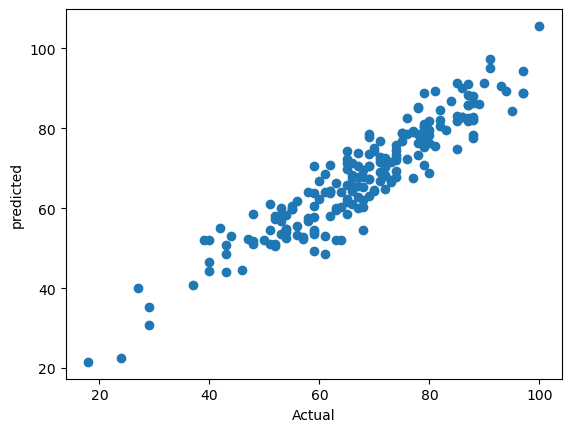

In [28]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')


<Axes: xlabel='math score'>

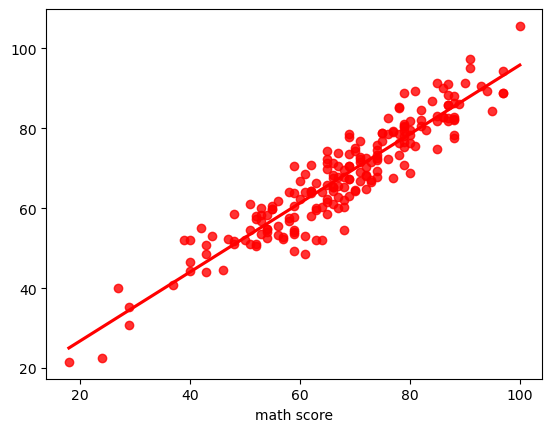

In [29]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')



Difference between Actual and predicted values


In [41]:
pred_df=pd.DataFrame({'Actual value':y_test,'predicted values':y_pred,'Difference':y_test-y_pred})
pred_df


,Actual value,predicted values,Difference
858,52,51.114625,0.885375
986,40,46.520975,-6.520975
183,65,62.219553,2.780447
502,63,60.038781,2.961219
710,93,90.678830,2.321170
...,...,...,...
27,67,65.489881,1.510119
244,75,76.925242,-1.925242
294,78,78.654367,-0.654367
176,46,44.655158,1.344842
